<a href="https://colab.research.google.com/github/DeepthiTabithaBennet/Python_DeepLearning/blob/main/FINAL_CNN_CatVSDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cat vs Dog Classification Using CNN**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Activation, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
train_path = '/content/gdrive/My Drive/Deep Learning Datasets/dataset/training_set'
test_path = '/content/gdrive/My Drive/Deep Learning Datasets/dataset/test_set'

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True
        )

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_ds = train_datagen.flow_from_directory(
        train_path,
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical',
        shuffle=True
        )

validation_ds = test_datagen.flow_from_directory(
        test_path,
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical',
        shuffle=True
        )

Found 8020 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=200, steps_per_epoch=20, validation_data=validation_ds)

Epoch 1/200
20/20 [==============================] - 584s 29s/step - loss: 7.5578 - accuracy: 0.5797 - val_loss: 2.2929 - val_accuracy: 0.5055
Epoch 2/200
20/20 [==============================] - 84s 4s/step - loss: 4.5531 - accuracy: 0.5813 - val_loss: 4.5409 - val_accuracy: 0.5005
Epoch 3/200
20/20 [==============================] - 81s 4s/step - loss: 3.4209 - accuracy: 0.5656 - val_loss: 7.2901 - val_accuracy: 0.5300
Epoch 4/200
20/20 [==============================] - 77s 4s/step - loss: 2.3166 - accuracy: 0.5969 - val_loss: 7.9103 - val_accuracy: 0.4925
Epoch 5/200
20/20 [==============================] - 65s 3s/step - loss: 1.7235 - accuracy: 0.6422 - val_loss: 6.1772 - val_accuracy: 0.4690
Epoch 6/200
20/20 [==============================] - 60s 3s/step - loss: 1.5042 - accuracy: 0.5516 - val_loss: 4.7279 - val_accuracy: 0.4820
Epoch 7/200
20/20 [==============================] - 59s 3s/step - loss: 1.0312 - accuracy: 0.5656 - val_loss: 4.4628 - val_accuracy: 0.5000
Epoch 8/200

In [ ]:
result = model.evaluate(validation_ds, verbose=1)

63/63 [==============================] - 11s 168ms/step - loss: 0.5439 - accuracy: 0.8165


In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
test_img = cv2.imread('/content/gdrive/MyDrive/Deep Learning Datasets/dataset/single_prediction/cat_or_dog_1.jpg')
# test_img = cv2.imread('/content/gdrive/MyDrive/Deep Learning Datasets/dataset/single_prediction/cat_or_dog_2.jpg')

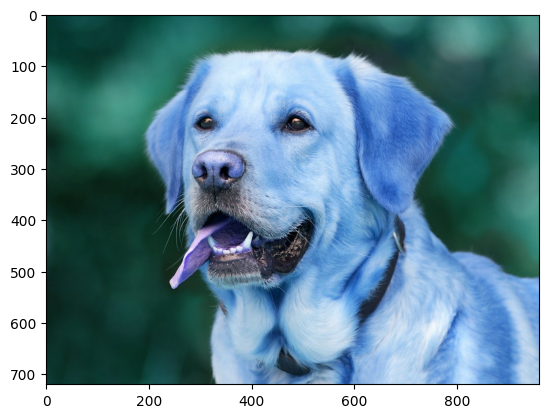

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(720, 960, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
output = model.predict(test_input)

1/1 [==============================] - 0s 277ms/step


In [ ]:
if output[0][0] == 1:
  print("Cat")

if output[0][0] == 0:
  print("Dog")

Dog
